## Please use notebook to practice.. I have attached screenshots of the outputs for your reference. Make sure to recap what you learned during the classes. Don't worry if you wont get everyting correct. You may need to search online about groupby() function before attemping.


### Import Pandas Library

In [2]:
import pandas as pd

In [3]:
ecom = pd.read_csv('data.csv',encoding= 'unicode_escape')

**Check the head of the DataFrame.**

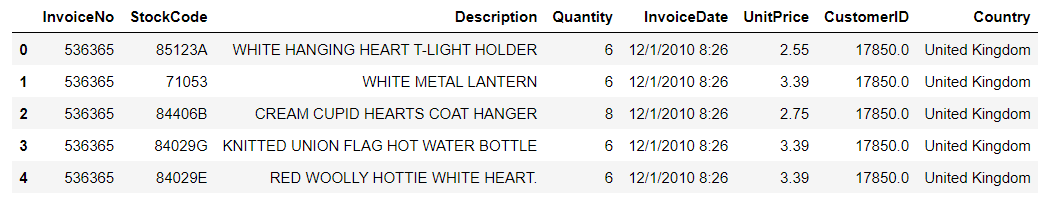

In [4]:
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Check the last 10 rows of the DataFrame.**

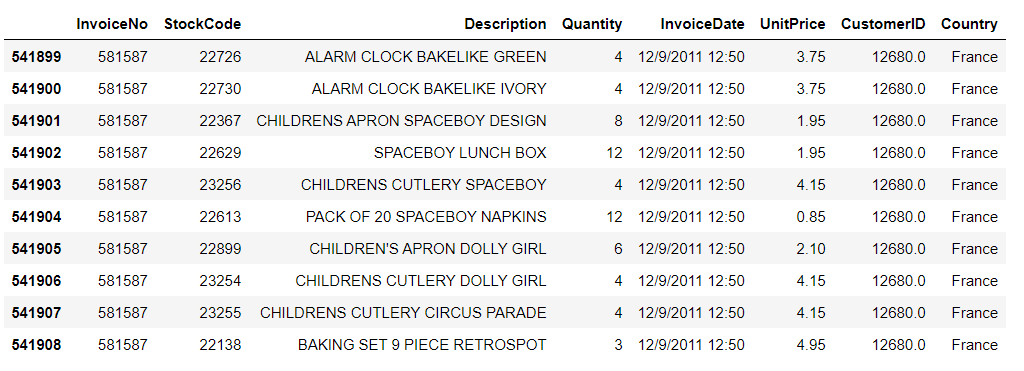

In [5]:
ecom.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/2011 12:50,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/2011 12:50,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


**How many rows and columns are there?**

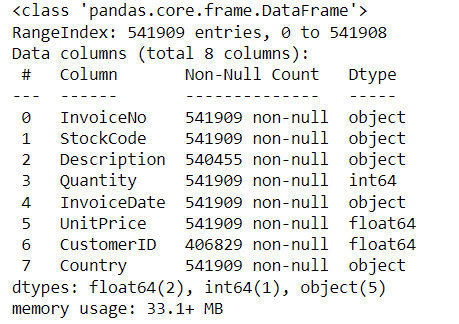

In [6]:
ecom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# What are your findings from this information?
This dataset is quite large. It contains more than 500 thousand records. Data types of each columns seem correct, except the CustomerID columns, which represented as decimal values, but should be treated as a categorical data.
Some columns contain missing information. Description column has 1,454 data points missing, but it's not important, as a StockCode is a better identifier for a specific product. 
CustomerID column has 135,080 null values, and it's going to be problematic if we decide to set the scope of the analysis to find the value of the customer.

**Show the statistical measurements of ecom dataset**

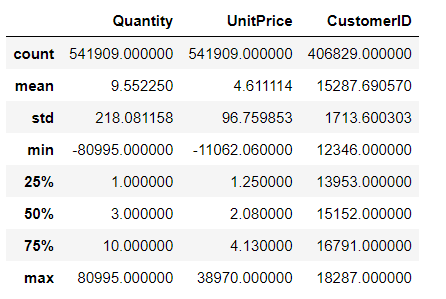

In [7]:
ecom.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
#std = standart deviation 

# What are your findings from this information? 
We have some wierd values on our dataset.

First of all, we've got negative values for both Quantity and UnitPrice variables. When negative price I can possibly justify, as a return mark on the database. A product has been bought for a price of, let say 12.99, then returned by guarantee, for example. The record with a negative value has been created in the store's db as a result. The negative values in the Quantity columns might be the result of the same approach. Meaning, if the quatity is negative, the price must be negative as well. 
This is my hypothesis, which needs to be tested. Also, I'm not sure how to resolve if my hypothesis is correct. Delete records with both negative and positive values for this transaction?

Second issue is the max values for both Quantity and UnitPrice variables, which are way out of the mean. Need to be explored.

Third, as I already mentioned, CustomerID should be treated as a text, not numerical value.

**Show the column names in dataset**

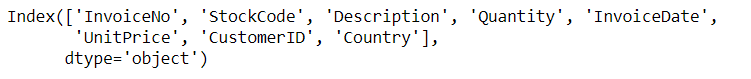

In [9]:
ecom.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
#number of columns
len(ecom.columns)

8

In [11]:
ecom.shape

(541909, 8)

In [12]:
rows_num, col_num = ecom.shape
print('Number of columns is', col_num)

Number of columns is 8


**What is the average Unit Price?**

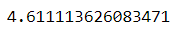

In [13]:
#your code here
ecom.UnitPrice.mean()

np.float64(4.611113626088513)

**What were the highest and lowest unit prices?**

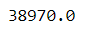

In [14]:
ecom.UnitPrice.max()

38970.0

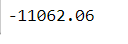

In [15]:
ecom.UnitPrice.min()


-11062.06

In [16]:
ecom.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


**Check missing values in each column**

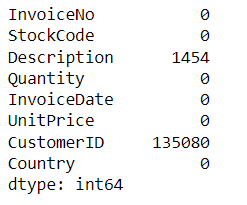

In [17]:
ecom.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Below code displays ratio of null values to entire rows in dataset.

In [18]:
ecom.isnull().sum().sum()/ecom.shape[0]*100
#percentage of null rows in this dataset

np.float64(25.195005065426113)

##### As you can see, there are only around %25 of null values.

In [19]:
ecom.isnull().sum().sum()
# just checking how it works

np.int64(136534)

In [20]:
ecom.shape[0]

541909

In [21]:
# also, didn't know I can refer to elements of a tuple by its indices 
x = ('Alesia', 'Yusuf', 'JustIT', 'Python')
student_name = x[0]
trainer_name = x[1]
print(student_name, trainer_name)

Alesia Yusuf


#### Check the shape of your dataset before dropping null values.

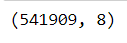

In [22]:
ecom.shape

(541909, 8)

In [23]:
#You can use bfill and ffill methods to fill in missing values.

[bfill and ffill methdos article](https://navinniish001.medium.com/pandas-bfill-and-ffill-b79e46ab87ae)


[fillna video](https://www.youtube.com/watch?v=3nJkPVrw44k)

In [24]:
ecom[ecom.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


**Drop null values. Use "inplace=True" argument**

This: `ecom_nonull = ecom.dropna(inplace=True)` leads to AttributeError

*From Stackoverflow:*
"When you use inplace=True, the dropna function does the operation in-place, and **does not return a dataframe** with renamed columns. Instead, it returns None, which then gets assigned to data - **making it a NoneType object**. Since data is no longer a df, calling head() on it leads to the error you're getting."

In [25]:
#your code here
ecom_nonull = ecom.dropna()
ecom_nonull.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [26]:
#percentage of null rows in this dataset
# Check %age of NULL values AFTER dropping the NULL VALUES
import pandas as pd
ecom_B = pd.read_csv('data.csv',encoding= 'unicode_escape')
 
print("--------------------------- BEFORE ---------------------------")
print("Total number of rows with NULL value=",ecom_B.isnull().sum().sum())
print("Total number of rows=",ecom_B.shape[0])
print("%age of number of rows with NULL value=",ecom_B.isnull().sum().sum()/ecom_B.shape[0]*100)
 
#ecom_A = ecom_B.dropna(inplace=True)
ecom_A = ecom_B.dropna()
 
print("--------------------------- AFTER ---------------------------")
print("Total number of rows with NULL value=",ecom_A.isnull().sum().sum())
print("Total number of rows=",ecom_A.shape[0])
print("%age of number of rows with NULL value=",ecom_A.isnull().sum().sum()/ecom_A.shape[0]*100)

--------------------------- BEFORE ---------------------------
Total number of rows with NULL value= 136534
Total number of rows= 541909
%age of number of rows with NULL value= 25.195005065426113
--------------------------- AFTER ---------------------------
Total number of rows with NULL value= 0
Total number of rows= 406829
%age of number of rows with NULL value= 0.0


#### Check the shape of your dataset after dropping null values.

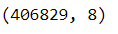

In [27]:
ecom_nonull.shape

(406829, 8)

**List the country names and number of records belongs to each country**

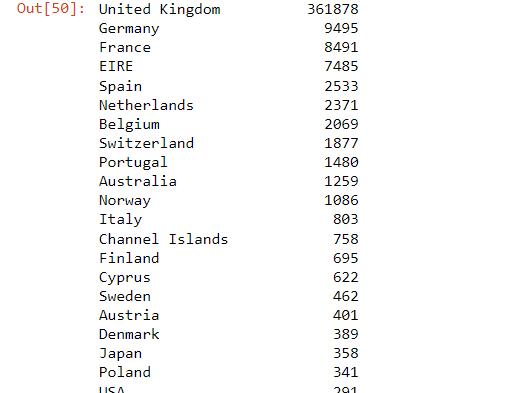

In [28]:
ecom_nonull['Country'].value_counts()

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [29]:
result = ecom_nonull.groupby('Country')['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo', ascending = False)
result.style.hide(axis='index')

Country,InvoiceNo
United Kingdom,361878
Germany,9495
France,8491
EIRE,7485
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1480
Australia,1259


**How many records are as Country United Kingdom?**

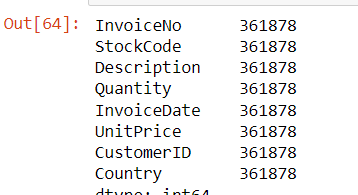

In [30]:
ecom_nonull[ecom_nonull['Country'] == 'United Kingdom'].count()

InvoiceNo      361878
StockCode      361878
Description    361878
Quantity       361878
InvoiceDate    361878
UnitPrice      361878
CustomerID     361878
Country        361878
dtype: int64

### Whats the average Unit Price without United Kingdom?

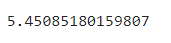

In [31]:
ecom_nonull[ecom_nonull['Country'] != 'United Kingdom']['UnitPrice'].mean()

np.float64(5.106509310137706)

In [32]:
ecom[ecom['Country'] != 'United Kingdom']['UnitPrice'].mean()

np.float64(5.45085180159807)

In [33]:
ecom_nonull.shape == ecom.shape

False

In [34]:
# Create a seperate dataframe only for UK

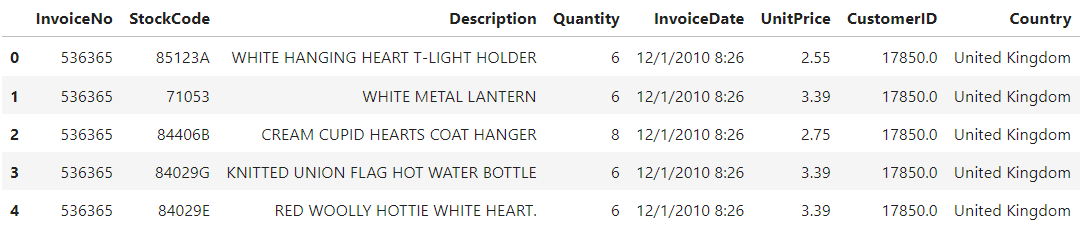

In [35]:
uk_only = ecom_nonull[ecom_nonull['Country'] == 'United Kingdom']
uk_only.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [36]:
uk_only.shape

(361878, 8)

### Average UnitPrice per Country
#### Use groupby function. 
[You can find out here](https://www.geeksforgeeks.org/pandas-groupby/)

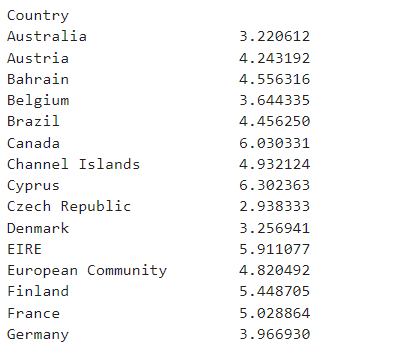

In [37]:
ecom.groupby('Country')['UnitPrice'].mean()

Country
Australia                 3.220612
Austria                   4.243192
Bahrain                   4.556316
Belgium                   3.644335
Brazil                    4.456250
Canada                    6.030331
Channel Islands           4.932124
Cyprus                    6.302363
Czech Republic            2.938333
Denmark                   3.256941
EIRE                      5.911077
European Community        4.820492
Finland                   5.448705
France                    5.028864
Germany                   3.966930
Greece                    4.885548
Hong Kong                42.505208
Iceland                   2.644011
Israel                    3.633131
Italy                     4.831121
Japan                     2.276145
Lebanon                   5.387556
Lithuania                 2.841143
Malta                     5.244173
Netherlands               2.738317
Norway                    6.012026
Poland                    4.170880
Portugal                  8.582976
RSA         

**Create a column named Total which shows the total amount of spend using UnitPrice and Quantity ?**


Hint: You can search online "create new column using other columns pandas"
("https://sparkbyexamples.com/pandas/pandas-add-column-based-on-another-column/") 
<p> Here is an example: df["NewColumnName"] = df["Column"] * df["Column"] <p\>

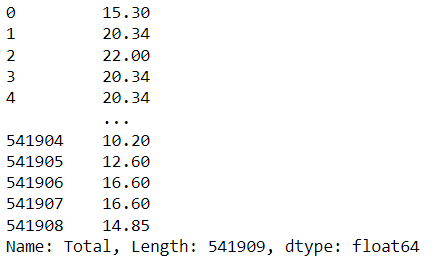

In [38]:
ecom['Total'] = ecom['UnitPrice']*ecom['Quantity']
ecom['Total']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Total, Length: 541909, dtype: float64

In [39]:
#Total spending by country 

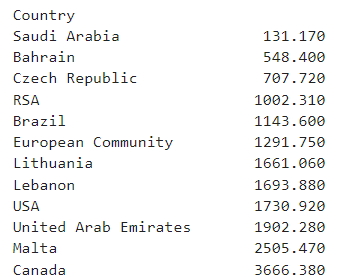

In [40]:
ecom.groupby('Country')['Total'].sum()

Country
Australia                137077.270
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20086.290
Cyprus                    12946.290
Czech Republic              707.720
Denmark                   18768.140
EIRE                     263276.820
European Community         1291.750
Finland                   22326.740
France                   197403.900
Germany                  221698.210
Greece                     4710.520
Hong Kong                 10117.040
Iceland                    4310.000
Israel                     7907.820
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213.140
Portugal            

In [54]:
ecom.groupby('Country')['Total'].sum().reset_index().sort_values(by='Total')

,Country,Total
29,Saudi Arabia,131.170
2,Bahrain,548.400
8,Czech Republic,707.720
28,RSA,1002.310
4,Brazil,1143.600
11,European Community,1291.750
22,Lithuania,1661.060
21,Lebanon,1693.880
34,USA,1730.920
35,United Arab Emirates,1902.280


### Highest Total by Customer and highest average by Customer

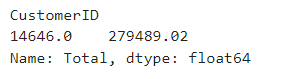

In [53]:
ecom.groupby('CustomerID')['Total'].agg(['sum', 'mean']).max()

sum     279489.02
mean      3861.00
dtype: float64

In [43]:
ecom.groupby("CustomerID")["Total"].sum().nlargest(1)

CustomerID
14646.0    279489.02
Name: Total, dtype: float64

In [44]:
ecom.groupby("CustomerID")["Total"].mean().nlargest(1)

CustomerID
15195.0    3861.0
Name: Total, dtype: float64

In [52]:
ecom.groupby("CustomerID")["Total"].sum().sort_values(ascending=False).head(1)

CustomerID
14646.0    279489.02
Name: Total, dtype: float64

In [46]:
ecom.groupby("CustomerID")["Total"].mean().sort_values(ascending=False).head(1)

CustomerID
15195.0    3861.0
Name: Total, dtype: float64

**Which Country spend least in total?**

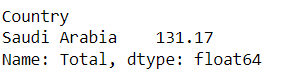

In [59]:
ecom.groupby('Country')['Total'].sum().sort_values().head(1)

Country
Saudi Arabia    131.17
Name: Total, dtype: float64

**What is the max Total spending in whole dataset and show the records of that spending ?**

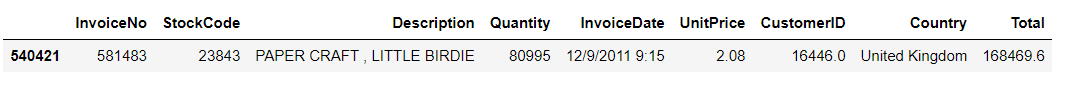

In [62]:
ecom[ecom['Total'] == ecom['Total'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,168469.6


**How many people who live in Spain spend more than average Total ?**

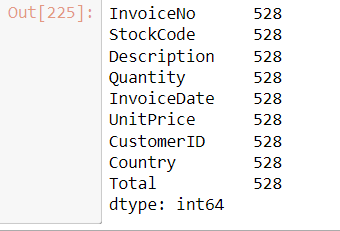

In [109]:
avg_total = ecom['Total'].mean()
spain_avg_total = ecom.groupby('Country')['Total'].mean()['Spain']
spain_only = ecom['Country'] == 'Spain'

In [107]:
# Total amount of customers who spend more than world total
ecom[(ecom['Country'] == 'Spain') & (ecom['Total'] > avg_total)].count()

InvoiceNo      728
StockCode      728
Description    728
Quantity       728
InvoiceDate    728
UnitPrice      728
CustomerID     728
Country        728
Total          728
dtype: int64

In [117]:
# Total amount of customers who spend more than Spain's average
ecom[spain_only & (ecom['Total'] > spain_avg_total)].count()

InvoiceNo      503
StockCode      503
Description    503
Quantity       503
InvoiceDate    503
UnitPrice      503
CustomerID     503
Country        503
Total          503
dtype: int64

### Optional 


**Calculate average of spending according to country with apply function?**

In [120]:
ecom.groupby('Country')['Total'].apply('mean')

Country
Australia               108.877895
Austria                  25.322494
Bahrain                  28.863158
Belgium                  19.773301
Brazil                   35.737500
Canada                   24.280662
Channel Islands          26.499063
Cyprus                   20.813971
Czech Republic           23.590667
Denmark                  48.247147
EIRE                     32.122599
European Community       21.176230
Finland                  32.124806
France                   23.069288
Germany                  23.348943
Greece                   32.263836
Hong Kong                35.128611
Iceland                  23.681319
Israel                   26.625657
Italy                    21.034259
Japan                    98.716816
Lebanon                  37.641778
Lithuania                47.458857
Malta                    19.728110
Netherlands             120.059696
Norway                   32.378877
Poland                   21.152903
Portugal                 19.333127
RSA         

### Further EDA
<p>Use this section to ask and answer your questions</p>

In [121]:
ecom.describe()

,Quantity,UnitPrice,CustomerID,Total
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [122]:
ecom[ecom['Quantity'] == ecom['Quantity'].min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,-168469.6


In [123]:
ecom[ecom['Quantity'] == ecom['Quantity'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,168469.6


In [128]:
ecom_clean = ecom.drop([540421, 540422])

In [129]:
ecom_clean.describe()

,Quantity,UnitPrice,CustomerID,Total
count,541907.000000,541907.000000,406827.000000,541907.000000
mean,9.552285,4.611123,15287.684876,17.987861
std,152.800603,96.760031,1713.602591,196.848550
min,-74215.000000,-11062.060000,12346.000000,-77183.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,74215.000000,38970.000000,18287.000000,77183.600000


In [131]:
ecom_clean[ecom_clean['Quantity'] == ecom_clean['Quantity'].min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,-77183.6


In [132]:
ecom_clean[ecom_clean['Quantity'] == ecom_clean['Quantity'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,77183.6


In [136]:
ecom[ecom['Quantity'] < 0].sort_values(['Quantity'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,-168469.60
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,-77183.60
225529,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom,-0.00
225530,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom,-0.00
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,-280.80
...,...,...,...,...,...,...,...,...,...
540087,C581466,22838,3 TIER CAKE TIN RED AND CREAM,-1,12/8/2011 19:20,14.95,13883.0,United Kingdom,-14.95
4288,C536758,21314,SMALL GLASS HEART TRINKET POT,-1,12/2/2010 14:25,2.10,13767.0,United Kingdom,-2.10
4306,C536760,22175,PINK OWL SOFT TOY,-1,12/2/2010 14:29,2.95,17547.0,United Kingdom,-2.95
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,-1.25


In [138]:
ecom[(ecom['Quantity']<0) & (ecom['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total


In [140]:
ecom[ecom['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom,0.0
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom,0.0
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom,0.0
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom,0.0
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,NaN,United Kingdom,0.0
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,NaN,United Kingdom,0.0
538554,581408,85175,NaN,20,12/8/2011 14:06,0.0,NaN,United Kingdom,0.0


## I like how many wierd values are here, so I decided to create a separate notebook to explore and clean it further. Cheers!

# Congrats!

<img src="https://i.pinimg.com/originals/6b/ed/c6/6bedc644c9d0899818134ddc4619ddfd.gif">